In [6]:
import requests
import zipfile
import io
import fnmatch
import shutil
import os

from pathlib import Path
from fastai.vision.all import *


In [7]:
print(URLs.PETS)
path = untar_data(URLs.PETS)/'images'    
path

https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz


In [9]:
def animal_labels(filename):    
    return filename[:filename.rfind('_')]  

In [10]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct = 0.25,
    seed = 42,
    label_func = animal_labels,
    item_tfms = Resize(224))

In [11]:
for vocab in dls.vocab:
    print(vocab)


Abyssinian
Bengal
Birman
Bombay
British_Shorthair
Egyptian_Mau
Maine_Coon
Persian
Ragdoll
Russian_Blue
Siamese
Sphynx
american_bulldog
american_pit_bull_terrier
basset_hound
beagle
boxer
chihuahua
coca_cola
english_cocker_spaniel
english_setter
german_shorthaired
great_pyrenees
havanese
japanese_chin
keeshond
leonberger
miniature_pinscher
newfoundland
pomeranian
pug
saint_bernard
samoyed
scottish_terrier
shiba_inu
staffordshire_bull_terrier
wheaten_terrier
yorkshire_terrier


In [12]:
learn = vision_learner(dls, resnet34, metrics = error_rate)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [25]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.747147,1.557589,0.460373,00:35


epoch,train_loss,valid_loss,error_rate,time
0,1.604516,1.410331,0.418447,00:41


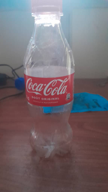

In [19]:
img = PILImage.create('fou.jpeg')
img.to_thumb(192)

In [30]:
animal_type, index, probs = learn.predict(img)
print(f"Predicted animal: {animal_type}.") 
print(f"Predicted animal probability: {probs[index]}")
print(f"Probabilities: {probs}")

Predicted animal: coca_cola.
Predicted animal probability: 0.8100615739822388
Probabilities: tensor([2.8806e-03, 8.0012e-03, 7.7094e-03, 1.6110e-02, 1.0279e-02, 8.2744e-04,
        4.6500e-02, 3.4114e-03, 6.2192e-03, 1.1483e-02, 2.2363e-03, 2.8610e-04,
        2.4438e-03, 1.1843e-02, 3.2093e-03, 4.3831e-03, 1.3107e-02, 1.6711e-03,
        8.1006e-01, 4.2743e-04, 4.6939e-04, 4.4918e-03, 8.8271e-05, 1.1891e-03,
        1.1395e-03, 6.3991e-04, 3.9495e-04, 1.2835e-03, 1.2718e-03, 6.8418e-03,
        3.3633e-03, 8.0185e-04, 5.7949e-04, 1.0904e-02, 4.4433e-04, 1.8051e-03,
        7.8105e-04, 4.2205e-04])


In [34]:
learn.path

Path('/home/.fastai/data/oxford-iiit-pet/images')